In [49]:
import arff
import numpy as np
from operator import attrgetter, itemgetter
from io import StringIO
from sklearn.model_selection import train_test_split
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support as score, average_precision_score

## training models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn import svm

import matplotlib.pyplot as plt


# Importing dataset

In [50]:
data = arff.load(open('OffComBR3.arff'))
df = pd.DataFrame(data['data'])
df.columns = ['hate', 'sentence']

# transforming 'yes' into 1 and 'no' into 0
df['hate'] = df['hate'].apply(lambda x: 1 if x == 'yes' else 0)

X = df['sentence'].tolist()
y = df['hate'].tolist()
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

# Creating multiple Classifiers Pipelines

In [51]:
classifiers = [
    {
        'name': 'Gradient Boosting',
        'pipeline': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf',GradientBoostingClassifier()),
        ])
    },
    {
        'name': 'Multinomial NB',
        'pipeline': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf', MultinomialNB()),
        ])
    },
    {
        'name': 'Random Forest',
        'pipeline': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf', RandomForestClassifier()),
        ])
    },
    {
        'name': 'Decision Tree',
        'pipeline': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf', tree.DecisionTreeClassifier()),
        ])
    },
    {
        'name': 'SGD',
        'pipeline': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf', SGDClassifier()),
        ])
    },
    {
        'name': 'SVC',
        'pipeline': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf', svm.SVC()),
        ])
    }
]

In [52]:
final_score = []
for x in classifiers:
    x['pipeline'].fit(X_train,y_train)
    pred = x['pipeline'].predict(X_test)
    precision, recall, fscore, support = score(y_test, pred)
    # Tirando a média de todos... futuramente podemos utilizar pesos (dada a importância de tal medida)

    final_score.append({
        'name': x['name'],
        'score': [ precision, recall, fscore],
        'weighted_precision': average_precision_score(y_test, pred, average='weighted')
        })

/home/shivwa/.virtualenvs/tcc/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shivwa/.virtualenvs/tcc/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/shivwa/.virtualenvs/tcc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/shivwa/.virtualenvs/tcc/

In [53]:
final_score

[{'name': 'Gradient Boosting',
  'score': [array([0.8164557, 0.64     ]),
   array([0.96629213, 0.21621622]),
   array([0.88507719, 0.32323232])],
  'weighted_precision': 0.3084663549179678},
 {'name': 'Multinomial NB',
  'score': [array([0.78698225, 0.66666667]),
   array([0.99625468, 0.02702703]),
   array([0.87933884, 0.05194805])],
  'weighted_precision': 0.2291617130326808},
 {'name': 'Random Forest',
  'score': [array([0.81639344, 0.5       ]),
   array([0.93258427, 0.24324324]),
   array([0.87062937, 0.32727273])],
  'weighted_precision': 0.28584449552191493},
 {'name': 'Decision Tree',
  'score': [array([0.848    , 0.3956044]),
   array([0.79400749, 0.48648649]),
   array([0.82011605, 0.43636364])],
  'weighted_precision': 0.30389314260282},
 {'name': 'SGD',
  'score': [array([0.81877023, 0.5625    ]),
   array([0.94756554, 0.24324324]),
   array([0.87847222, 0.33962264])],
  'weighted_precision': 0.3010471982246176},
 {'name': 'SVC',
  'score': [array([0.7829912, 0.       ]),


# Sorts precision data

In [58]:
precision_data = sorted(final_score, key=lambda x: np.mean(x['score'][0]))
recall_data = sorted(final_score, key=lambda x: np.mean(x['score'][1]))
fscore_data = sorted(final_score, key=lambda x: np.mean(x['score'][2]))

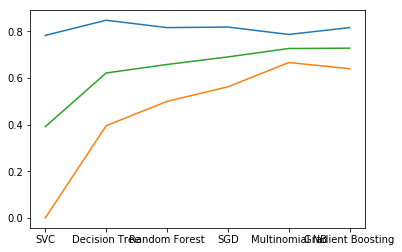

In [70]:
plt.plot([item['name'] for item in precision_data], [item['score'][0] for item in precision_data])
plt.plot([item['name'] for item in precision_data], [np.mean(item['score'][0]) for item in precision_data])

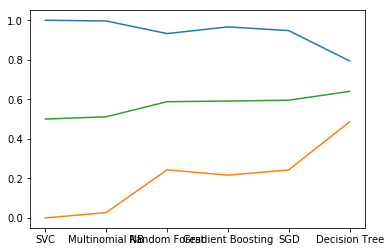

In [78]:
plt.plot([item['name'] for item in recall_data], [item['score'][1] for item in recall_data])
plt.plot([item['name'] for item in recall_data], [np.mean(item['score'][1]) for item in recall_data])

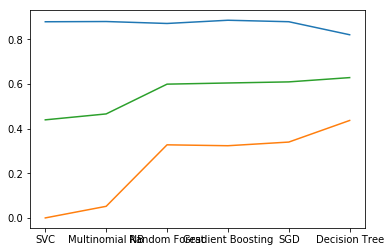

In [79]:
plt.plot([item['name'] for item in fscore_data], [item['score'][2] for item in fscore_data])
plt.plot([item['name'] for item in fscore_data], [np.mean(item['score'][2]) for item in fscore_data])

# Best weighted precision / class 1 recall

In [28]:
final_score.sort(key=lambda x: x['weighted_precision'])

In [32]:
final_score[-1]

{'name': 'SGD',
 'score': [0.7240504836046238, 0.5961382731045652, 0.6106576234215504],
 'weighted_precision': 0.311800069864586,
 'final_result': 0.6436154600435798}

In [42]:
final_score.sort(key=lambda x: x['score'][1][1])

In [43]:
final_score

[{'name': 'SVC',
  'score': [array([0.7829912, 0.       ]),
   array([1., 0.]),
   array([0.87828947, 0.        ])],
  'weighted_precision': 0.21700879765395895},
 {'name': 'Multinomial NB',
  'score': [array([0.78698225, 0.66666667]),
   array([0.99625468, 0.02702703]),
   array([0.87933884, 0.05194805])],
  'weighted_precision': 0.2291617130326808},
 {'name': 'Gradient Boosting',
  'score': [array([0.8170347 , 0.66666667]),
   array([0.97003745, 0.21621622]),
   array([0.8869863 , 0.32653061])],
  'weighted_precision': 0.3142321206837336},
 {'name': 'Random Forest',
  'score': [array([0.81761006, 0.69565217]),
   array([0.97378277, 0.21621622]),
   array([0.88888889, 0.32989691])],
  'weighted_precision': 0.3204992573856529},
 {'name': 'SGD',
  'score': [array([0.82410423, 0.58823529]),
   array([0.94756554, 0.27027027]),
   array([0.8815331 , 0.37037037])],
  'weighted_precision': 0.31734028318468543},
 {'name': 'Decision Tree',
  'score': [array([0.83266932, 0.35555556]),
   array(